# 1. Comprensión del problema
Antes de comenzar, es importante asegurarse de comprender completamente el conjunto de datos y los objetivos de la librería. Hablar con los propietarios o responsables para obtener información sobre eventos especiales, cambios en la gestión o cualquier otro factor que pueda haber influido en los ingresos y gastos.

# 2. Importanción de datos
Se importa el archivo de Excel que contiene los datos de ingresos y gastos al entorno de trabajo en Python.

In [380]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [381]:
# Paso 1: Importa la biblioteca Pandas
import pandas as pd

# Paso 2: Reemplaza 'nombre_del_archivo.xlsx' con el nombre del archivo Excel
archivo_excel = 'Librería.xlsx'

# Paso 3: Se utiliza la función read_excel para cargar los datos desde el archivo Excel
data = pd.read_excel(archivo_excel)

# 3. Exploración de Datos
Se examinan las primeras filas del conjunto de datos para comprender su estructura y tipos de variables.

## Mostrar las primeras filas del DataFrame

In [382]:
print(data.head())

       Fecha Categoría  Cantidad
0 2022-01-07    Gastos    2678.7
1 2022-02-05  Ingresos    7050.8
2 2022-01-10    Gastos     200.0
3 2022-01-11    Gastos     990.8
4 2022-01-11    Gastos     493.1


Se utiliza el método head() del DataFrame para imprimir las primeras filas del conjunto de datos. Esto facilita una vista previa rápida de cómo se ven los datos. Por defecto, head() mostrará las primeras 5 filas, pero se puede especificar un número diferente entre paréntesis si se desea ver más o menos filas.

In [383]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      102 non-null    datetime64[ns]
 1   Categoría  102 non-null    object        
 2   Cantidad   102 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.5+ KB
None


Se ha utilizando el método info() del DataFrame. Este método proporciona información general sobre el conjunto de datos, incluyendo el número total de entradas, el número de columnas, el tipo de datos de cada columna y la cantidad de valores no nulos. 

# 4. Limpieza de Datos
Se tratan los valores nulos, se eliminan los duplicados y se realizan otras tareas de limpieza según sea necesario.

## Tratar los valores nulos

In [384]:
data = data.dropna()
print(data)

         Fecha Categoría  Cantidad
0   2022-01-07    Gastos    2678.7
1   2022-02-05  Ingresos    7050.8
2   2022-01-10    Gastos     200.0
3   2022-01-11    Gastos     990.8
4   2022-01-11    Gastos     493.1
..         ...       ...       ...
97  2022-12-19    Gastos    3348.3
98  2022-12-27    Gastos      87.4
99  2022-12-27    Gastos      94.3
100 2022-12-30    Gastos      78.2
101 2022-12-30    Gastos     332.5

[102 rows x 3 columns]


En este paso, se ha utilizado el método dropna() del DataFrame de Pandas. Este método elimina todas las filas que contienen al menos un valor nulo. Los valores nulos pueden surgir por diversas razones, como datos faltantes o errores durante la recopilación de datos.

# Eliminar duplicados

In [385]:
data = data.drop_duplicates()

En este paso, se ha utilizado el método drop_duplicates() del DataFrame de Pandas. Este método elimina las filas duplicadas del conjunto de datos.

In [386]:
# Rellenar valores nulos en lugar de eliminarlos
# data = data.fillna(valor_de_relleno)

# Otra estrategia para tratar con valores nulos
# data = data.dropna(subset=['columna1', 'columna2'])

Estas líneas de código son parte de un proceso común en la ciencia de datos conocido como limpieza de datos. 

# 5. Transformación de Datos
Se convierten las columnas de fechas al formato adecuado y se crean nuevas variables si es necesario (por ejemplo, año, mes).

# Convertir la columna de fechas al formato adecuado

In [387]:
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d de %B de %Y', errors='coerce')
print(data['Fecha'])

0     2022-01-07
1     2022-02-05
2     2022-01-10
3     2022-01-11
4     2022-01-11
         ...    
97    2022-12-19
98    2022-12-27
99    2022-12-27
100   2022-12-30
101   2022-12-30
Name: Fecha, Length: 102, dtype: datetime64[ns]


Esto permite convertir las fechas que sí coinciden con el formato, mientras que los valores que no coinciden se marcarán como valores nulos. Luego se puede decidir cómo manejar estos valores nulos según sea apropiado para el análisis.

# Crear columnas de año y mes

In [388]:
# Se convierte la columna de fechas al formato adecuado
data['Fecha'] = pd.to_datetime(data['Fecha'])
print(data['Fecha'])

0     2022-01-07
1     2022-02-05
2     2022-01-10
3     2022-01-11
4     2022-01-11
         ...    
97    2022-12-19
98    2022-12-27
99    2022-12-27
100   2022-12-30
101   2022-12-30
Name: Fecha, Length: 102, dtype: datetime64[ns]


In [390]:
# Crear una columna de mes
data['Mes'] = data['Fecha'].dt.month
print(data['Mes'])

0       1
1       2
2       1
3       1
4       1
       ..
97     12
98     12
99     12
100    12
101    12
Name: Mes, Length: 102, dtype: int32


Este código adicional crea una nueva columna llamada 'Mes' que contiene el número del mes correspondiente a cada fecha en la columna 'Fecha'.

# 6. Análisis Descriptivo
Calcula estadísticas descriptivas básicas y visualiza los datos para obtener una comprensión general.

# Importar bibliotecas necesarias y cargar los datos

In [391]:
import pandas as pd
import matplotlib.pyplot as plt

# Se reemplaza 'nombre_del_archivo.xlsx' con el nombre del archivo Excel
data = pd.read_excel('Librería.xlsx')

# Calcular estadísticas descriptivas básicas

In [392]:
descripcion = data.describe()
print(descripcion)

                               Fecha      Cantidad
count                            102    102.000000
mean   2022-07-12 08:14:07.058823424   1868.200980
min              2022-01-05 00:00:00     23.700000
25%              2022-04-05 12:00:00    113.050000
50%              2022-07-23 00:00:00    544.250000
75%              2022-10-11 12:00:00   2723.550000
max              2022-12-30 00:00:00  18859.200000
std                              NaN   3450.172343


Aquí, estamos utilizando el método describe() del DataFrame de Pandas para obtener estadísticas descriptivas básicas de las variables numéricas en el conjunto de datos. Este paso proporciona información como la media, desviación estándar, mínimo, 25%, 50% (mediana), 75%, y máximo de cada columna numérica.

# 7. Visualizaciones

In [393]:
print(data.columns)

Index(['Fecha', 'Categoría', 'Cantidad'], dtype='object')


In [394]:
print(data.dtypes)

Fecha        datetime64[ns]
Categoría            object
Cantidad            float64
dtype: object


In [395]:
print(monthly_avg.head())

            Cantidad  Factura
Fecha                        
2022-01-05    810.20  78219.0
2022-01-07   2678.70  62406.0
2022-01-10    200.00  78520.0
2022-01-11    741.95  59096.0
2022-01-12   1136.70  62581.0


In [396]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


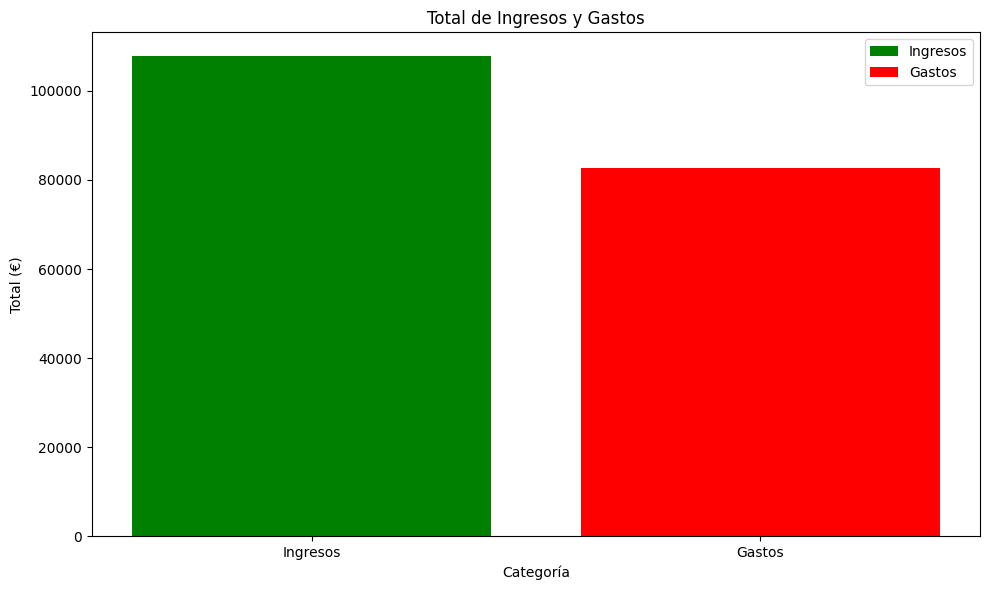

In [397]:
import pandas as pd
import matplotlib.pyplot as plt

# El archivo Excel llamado "Ingresos_gastos.xlsx"
archivo_excel = "Ingresos_gastos.xlsx"

# Cargar datos desde el archivo Excel
df = pd.read_excel(archivo_excel)

# Filtrar los datos por categoría (Ingresos y Gastos)
ingresos = df[df['Categorías'] == 'Ingresos']
gastos = df[df['Categorías'] == 'Gastos']

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear barras para los ingresos y gastos
ax.bar("Ingresos", ingresos['Total'].sum(), label='Ingresos', color='green')
ax.bar("Gastos", gastos['Total'].sum(), label='Gastos', color='red')

# Añadir etiquetas y título
ax.set_ylabel('Total (€)')
ax.set_xlabel('Categoría')
ax.set_title('Total de Ingresos y Gastos')

# Mostrar leyenda
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La librería goza de una buena situación financiera debido a que sus ingresos son mayores que sus gastos. Esto significa que la librería está generando beneficios, lo cual es un indicador de la salud financiera de cualquier negocio. A pesar de los costes asociados con la operación de la librería, los ingresos generados por las ventas de libros y otros productos superan estos gastos, resultando en un balance positivo. Esta situación financiera favorable permite a la librería reinvertir en su crecimiento y desarrollo, asegurando su viabilidad a largo plazo.

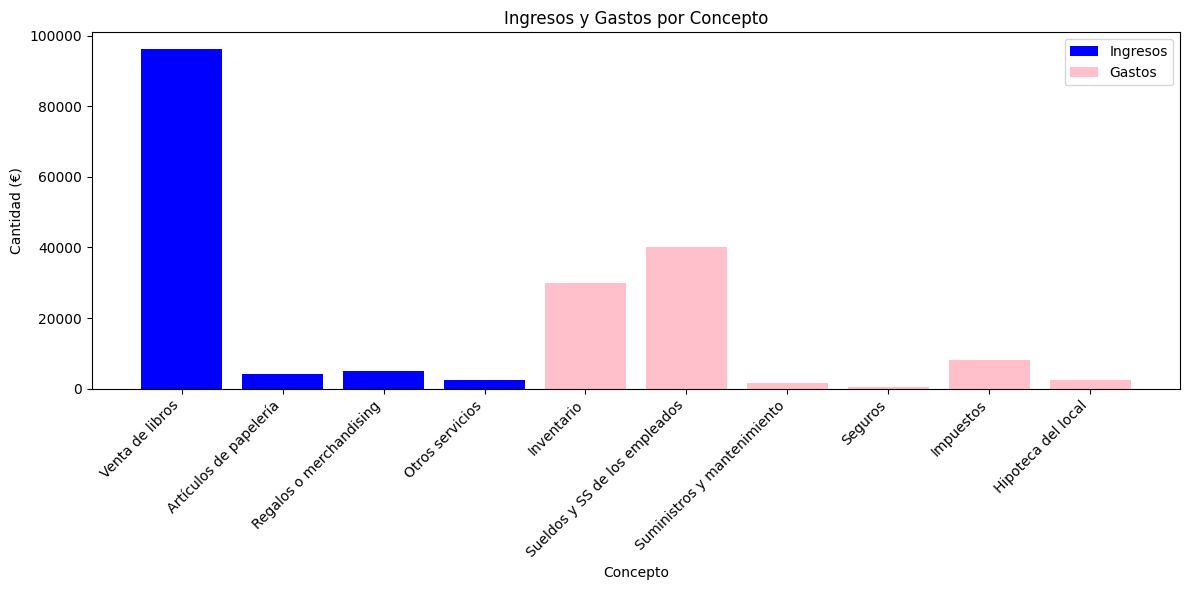

In [398]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tenemos un DataFrame con los datos
data = {
    'Categorías': ['Ingresos', 'Ingresos', 'Ingresos', 'Ingresos', 'Gastos', 'Gastos', 'Gastos', 'Gastos', 'Gastos', 'Gastos'],
    'Concepto': ['Venta de libros', 'Artículos de papelería', 'Regalos o merchandising', 'Otros servicios', 'Inventario', 'Sueldos y SS de los empleados', 'Suministros y mantenimiento', 'Seguros', 'Impuestos', 'Hipoteca del local'],
    'Cantidad': [96152.50, 4030.60, 5020.20, 2560.10, 30040.30, 40179.60, 1504.10, 600.00, 8045.40, 2400.00]
}

df = pd.DataFrame(data)

# Crear una nueva columna 'Tipo' basada en el Concepto
df['Tipo'] = df['Concepto'].apply(lambda x: 'Ingresos' if x in ['Venta de libros', 'Artículos de papelería', 'Regalos o merchandising', 'Otros servicios'] else 'Gastos')

# Filtrar los datos por 'Ingresos' y 'Gastos'
ingresos = df[df['Tipo'] == 'Ingresos']
gastos = df[df['Tipo'] == 'Gastos']

# Colores personalizados
color_ingresos = 'blue'
color_gastos = 'pink'

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear barras para los ingresos y gastos con colores personalizados
ax.bar(ingresos['Concepto'], ingresos['Cantidad'], label='Ingresos', color=color_ingresos)
ax.bar(gastos['Concepto'], gastos['Cantidad'], label='Gastos', color=color_gastos)

# Añadir etiquetas y título
ax.set_ylabel('Cantidad (€)')
ax.set_xlabel('Concepto')
ax.set_title('Ingresos y Gastos por Concepto')

# Rotar las etiquetas en el eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.legend()
plt.show()

El ingreso principal de la librería proviene de la venta de libros. Cada libro que se vende contribuye al flujo de ingresos del negocio y es gracias a la constante demanda de los clientes que la librería ha podido mantener un flujo de ingresos saludable.

Por otro lado, el gasto principal de la librería es el sueldo y la seguridad social de los empleados. La librería cuenta con unos empleados dedicados que trabajan para proporcionar un servicio de calidad a los clientes. Los sueldos de estos empleados, junto con las contribuciones a la seguridad social, representan la mayor parte de los gastos del negocio.

Estos gastos son una inversión en el equipo humano de la librería, ya que son ellos quienes interactúan con los clientes, gestionan las ventas y mantienen el orden y la organización de la tienda. A pesar de ser el mayor gasto, es una inversión necesaria para garantizar el buen funcionamiento del negocio.

En resumen, la librería tiene una buena salud financiera, con los ingresos generados principalmente a través de la venta de libros y los gastos incurridos principalmente en el sueldo y la seguridad social de los empleados.

# 8. Identificación de Patrones y Tendencias
Se utlizan técnicas estadísticas y visualizaciones para identificar patrones estacionales, tendencias a largo plazo y eventos significativos.

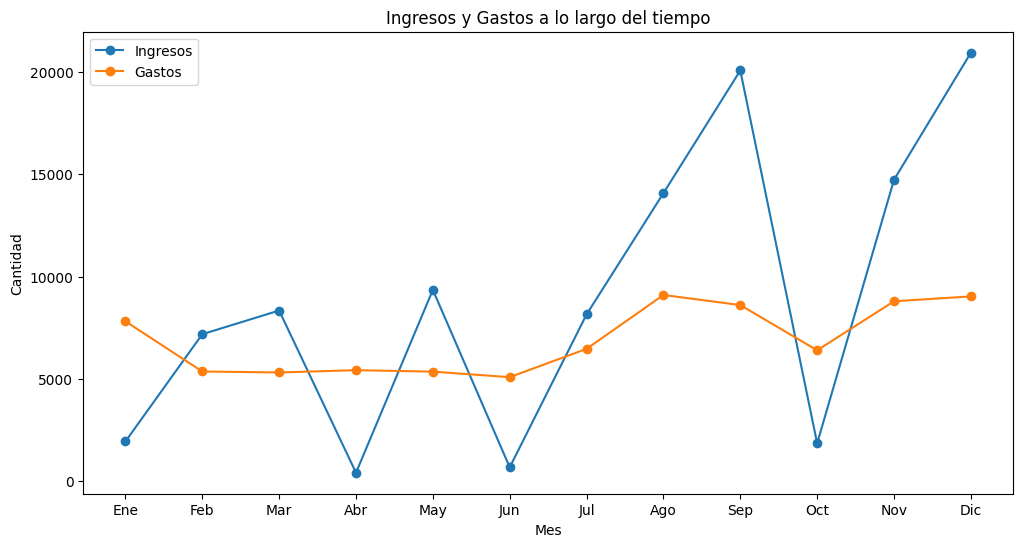

In [399]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel
file_path = 'Largo_del_tiempo.xlsx'
df = pd.read_excel(file_path)

# Convertir la columna 'Fecha' al formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

# Crear columnas adicionales para el mes y el año
df['Mes'] = df['Fecha'].dt.month
df['Año'] = df['Fecha'].dt.year

# Agrupar por mes y categoría y sumar las cantidades
df_grouped = df.groupby(['Año', 'Mes', 'Categoría']).agg({'Cantidad': 'sum'}).reset_index()

# Filtrar por categoría (Ingresos y Gastos)
ingresos = df_grouped[df_grouped['Categoría'] == 'Ingresos']
gastos = df_grouped[df_grouped['Categoría'] == 'Gastos']

# Crear un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(ingresos['Mes'], ingresos['Cantidad'], label='Ingresos', marker='o')
plt.plot(gastos['Mes'], gastos['Cantidad'], label='Gastos', marker='o')

# Añadir etiquetas y leyenda
plt.title('Ingresos y Gastos a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()

# Mostrar el gráfico
plt.show()

La librería es un negocio que experimenta variaciones en sus ingresos y gastos a lo largo del año, debido a factores estacionales y operativos.

A finales del verano, los ingresos de la librería tienden a aumentar debido al comienzo del año escolar. Los estudiantes y sus familias acuden a la librería para comprar libros de texto y material de lectura para el nuevo curso escolar. Este aumento en las ventas contribuye a un incremento significativo en los ingresos durante este período.

Además, durante la temporada navideña, la librería también experimenta un aumento en los ingresos debido a las compras de regalos. Los libros son un regalo popular durante las fiestas y muchos clientes acuden a la librería en busca de regalos para sus seres queridos. Igualmente se venden otro tipo de árticulos como mochilas, peluches, juegos, etc.

Sin embargo, durante el resto del año, los ingresos tienden a ser más bajos. Esto se debe a que hay menos eventos que impulsan las ventas de libros, como el comienzo del año escolar o las fiestas navideñas.

En cuanto a los gastos, estos tienden a ser más altos durante el verano y el invierno. Durante el verano, el gasto en aire acondicionado aumenta debido a la necesidad de mantener un ambiente fresco y cómodo para los clientes. De manera similar, durante el invierno, el gasto en calefacción aumenta para mantener la librería cálida.

Además, durante estos períodos, la librería también incurre en gastos adicionales debido al inventario de libros y otros productos. A finales del verano, la librería debe abastecerse de libros de texto y material de lectura para el comienzo del año escolar. De manera similar, antes de la temporada navideña, la librería debe aumentar su inventario para satisfacer la demanda de libros como regalos.

En resumen, la librería experimenta variaciones en sus ingresos y gastos a lo largo del año. A pesar de estos desafíos, la librería ha logrado mantener una buena salud financiera y sigue siendo un negocio próspero.

# 9. Recomendaciones
Basándome en los hallazgos del análisis financiero de la librería, sugiero las siguientes acciones para mejorar su gestión financiera:

- Optimizar el inventario: Dado que el inventario representa un gasto significativo, sería beneficioso revisar las prácticas actuales de gestión de inventario. Esto podría incluir la identificación de libros de baja venta para reducir el stock y la inversión en títulos más populares.

- Revisar los gastos de personal: Los sueldos y la seguridad social de los empleados son otro gasto importante. Podría ser útil revisar las políticas de contratación y remuneración para asegurar que sean competitivas y sostenibles.

- Explorar nuevas oportunidades de ingresos: Además de la venta de libros, artículos de papelería y regalos, podría ser beneficioso explorar otras oportunidades de ingresos. Esto podría incluir la organización de eventos literarios, clubes de lectura o talleres de escritura.

- Implementar estrategias de marketing efectivas: Las estrategias de marketing pueden ayudar a aumentar las ventas durante los períodos de menor actividad. Esto podría incluir promociones especiales, programas de lealtad o publicidad dirigida.

- Planificar para los períodos de mayor actividad: La Navidad y el final del verano son períodos de alta actividad para la librería. Sería beneficioso planificar con anticipación para estos períodos para asegurar que se tiene suficiente inventario y personal para satisfacer la demanda.

Estas recomendaciones, si se implementan, podrían ayudar a mejorar la gestión financiera de la librería y asegurar su éxito.